<h1 align="center">MLP Classifier on MNIST dataset</h1>



## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV, StratifiedShuffleSplit


In [2]:
cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

## Load Datasets

In [3]:
x,y=fetch_openml('mnist_784',version=1,return_X_y=True)
x=x.to_numpy()
y=y.to_numpy()
x_train,y_train, x_test,y_test= x[:60000],y[:60000],x[60000:],y[60000:]

In [4]:
#reshaping into 1-D vectors for MLP classifier
x_train=x_train.reshape(x_train.shape[0],28*28)
x_test=x_test.reshape(x_test.shape[0],28*28)
#normalising in range of [0,1]
x_train=x_train/255
x_test=x_test/255

In [5]:
print("Shape of training data= ",x_train.shape)
print("Shape of testing data= ",x_test.shape)


Shape of training data=  (60000, 784)
Shape of testing data=  (10000, 784)


In [6]:
print("Shape of training labels= ",y_train.shape)
print("Shape of test labels= ",y_test.shape)

Shape of training labels=  (60000,)
Shape of test labels=  (10000,)


## MLP classifier applied on MNIST

In [7]:
mlpc=MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(128,))

## Accuracy scores: 

In [8]:
cv_score=cross_val_score(mlpc,x_train,y_train.ravel(),cv=cv)
print("Training Accuracy: {:2f}%".format(cv_score.mean()*100))

Training Accuracy: 97.568333%


In [9]:
mlpc.predict_proba(x_test)
y_pred=mlpc.predict(x_test)

In [10]:
print("Train accuracy: {:.2f}%".format(accuracy_score(y_train,mlpc.predict(x_train))*100))
print("Test accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train accuracy: 100.00%
Test accuracy: 98.00%


## Confusion Matrix

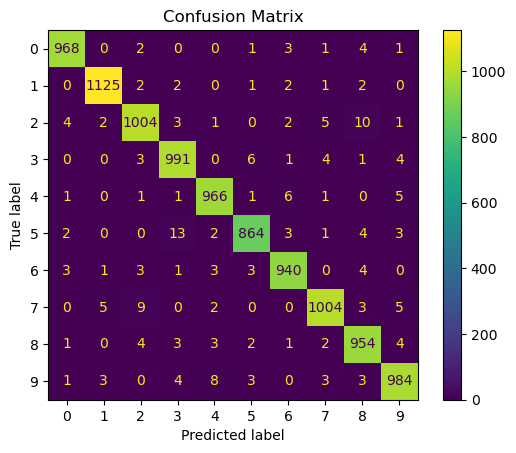

In [11]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

## Classification Report:

Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



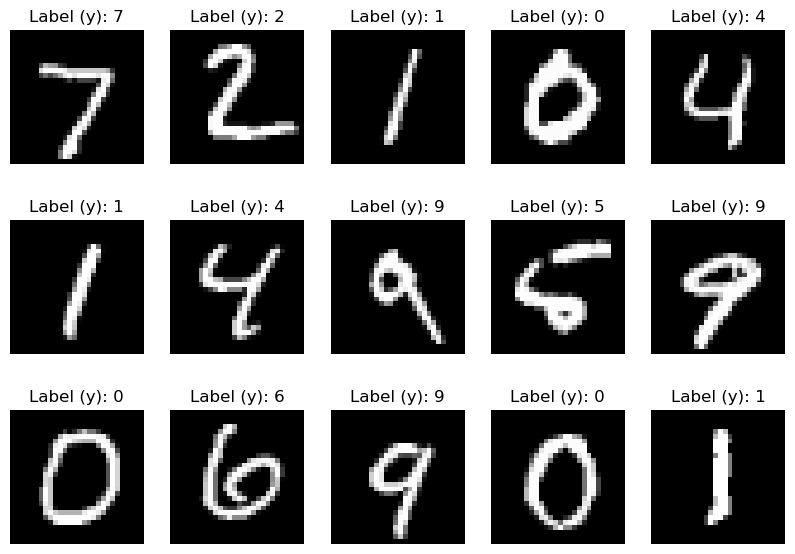

In [12]:
CR=classification_report(y_test,y_pred)
print("Classification Report: \n")
print(CR)
#plotting of test data along with predicted class labels
fig=plt.figure(figsize=(10,7))
for i in range(15):
    ax=fig.add_subplot(3,5,i+1)
    ax.imshow(x_test[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y_pred[i]))
    plt.axis('off')

### References: 

1. https://youtu.be/lvS2ZHJeyng?feature=shared
2. https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html